In [1]:
# 24 patient training cohort
# for the CT, each slice is normalised from 0 to 1 based on the previous method of applying a max HU limit of 2000HU
# and then normalising the -1000 to 2000 HU values from 0 to 1
# For the MRI, each slice is normalised from 0 to 1 based on 0 to NEAR MAX 99.995% value (rather than max value as in v2) 
# for that patient

# the training arrays here are already normalised whereas previously they are saved as pre-normalised values


In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
import dicom_numpy
import math
import dicom
import os
import numpy as np
import sys
import json
import nibabel as nib
#from scipy.ndimage import zoom

C:\Users\cht17\AppData\Local\Continuum\anaconda3\envs\tensorflowChris\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
def extract_voxel_data(list_of_dicom_files):
    datasets = [dicom.read_file(f) for f in list_of_dicom_files]
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)
    except dicom_numpy.DicomImportException as e:
        # invalid DICOM data
        raise
    return voxel_ndarray

In [4]:
First12Pts = [1,3,7,18,19,20,21,22,25,26,27,28]

In [5]:
Second12Pts =[17,23,32,33,35,36,37,39,40,42,43,50]

In [6]:
Second12PtsSlices = [[54, 0, 40, 15, 33, 21, 32, 24, 12, 28, 28, 26],[89, 76, 116, 93, 91, 67, 93, 86, 86, 107, 73, 104]]

In [7]:
Second12PtsSlicesPerPt = [36, 77, 77, 79, 59, 47, 62, 63, 75, 80, 46, 79]

In [8]:
# TotalSlices = np.sum(SlicesPerPatient)
# TotalSlices

In [9]:
CTArrayAll = np.zeros((512,512,0))

In [10]:
np.shape(CTArrayAll)

(512, 512, 0)

In [11]:
#testing one patient:
FirstPatientCTArray = np.zeros((512,512,0))
print(np.shape(FirstPatientCTArray))
for i in range (0,1):
    PathDicomCT = os.path.join("D:/CNNdata/SynCT_LargerCohort/"+str(First12Pts[i])+"/CT")
    print("PathDicomCT = ",PathDicomCT)

    lstFilesDCM_CT = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicomCT):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM_CT.append(os.path.join(dirName,filename))

    CTarray = extract_voxel_data(lstFilesDCM_CT)
    print(np.shape(CTarray))
    CTslices = np.size(CTarray,2)
    print(CTslices)
    
    MinValue = np.min(CTarray)
    print("min value = ", MinValue)
    MaxValue = np.max(CTarray)
    print("max value = ", MaxValue)
    
    NearMaxValue = np.percentile(CTarray, 99.5)
    print("near-max value = ", NearMaxValue)    
    
    FirstPatientCTArray = np.concatenate((FirstPatientCTArray,CTarray),axis=2)

(512, 512, 0)
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/1/CT
(512, 512, 79)
79
min value =  -1000.0
max value =  5021.0
near-max value =  554.0


1219.0


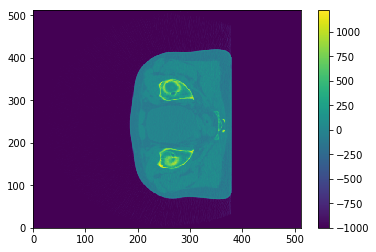

In [12]:
print(np.max(FirstPatientCTArray[:,:,60]))
plt.pcolormesh(FirstPatientCTArray[:,:,60])
plt.colorbar()
# I checked a few slices in MIM to ensure the HU values match. 
# They match exactly

In [13]:
First12CTArray = np.zeros((512,512,0))
print(np.shape(First12CTArray))
for i in range (0,12):
    PathDicomCT = os.path.join("D:/CNNdata/SynCT_LargerCohort/"+str(First12Pts[i])+"/CT")
    print("PathDicomCT = ",PathDicomCT)

    lstFilesDCM_CT = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicomCT):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM_CT.append(os.path.join(dirName,filename))

    CTarray = extract_voxel_data(lstFilesDCM_CT)
    print(np.shape(CTarray))
    CTslices = np.size(CTarray,2)
    print(CTslices)
    
    MinValue = np.min(CTarray)
    print(MinValue)
    MaxValue = np.max(CTarray)
    print(MaxValue)
    
    First12CTArray = np.concatenate((First12CTArray,CTarray),axis=2)


(512, 512, 0)
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/1/CT
(512, 512, 79)
79
-1000.0
5021.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/3/CT
(512, 512, 79)
79
-1000.0
5782.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/7/CT
(512, 512, 78)
78
-1000.0
16280.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/18/CT
(512, 512, 83)
83
-1000.0
3682.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/19/CT
(512, 512, 38)
38
-1000.0
16107.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/20/CT
(512, 512, 85)
85
-1000.0
4129.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/21/CT
(512, 512, 79)
79
-1000.0
3655.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/22/CT
(512, 512, 57)
57
-1000.0
3091.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/25/CT
(512, 512, 84)
84
-1000.0
4942.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/26/CT
(512, 512, 79)
79
-1000.0
4624.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/27/CT
(512, 512, 76)
76
-1000.0
2862.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/28/CT
(512, 512, 7

In [14]:
np.shape(First12CTArray)

(512, 512, 891)

In [15]:
Second12CTArray = np.zeros((512,512,0))
print(np.shape(Second12CTArray))
for i in range (0,12):
    PathDicomCT = os.path.join("D:/CNNdata/SynCT_LargerCohort/"+str(Second12Pts[i])+"/CT")
    print("PathDicomCT = ",PathDicomCT)

    lstFilesDCM_CT = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicomCT):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM_CT.append(os.path.join(dirName,filename))

    CTarray = extract_voxel_data(lstFilesDCM_CT)
    print(np.shape(CTarray))
    CTslices = np.size(CTarray,2)
    print(CTslices)
    
    CTarrayCrop = CTarray[:,:,Second12PtsSlices[0][i]:Second12PtsSlices[1][i]+1]

    MinValue = np.min(CTarrayCrop)
    print(MinValue)
    MaxValue = np.max(CTarrayCrop)
    print(MaxValue)
    
    Second12CTArray = np.concatenate((Second12CTArray,CTarrayCrop),axis=2)


(512, 512, 0)
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/17/CT
(512, 512, 162)
162
-1000.0
5142.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/23/CT
(512, 512, 121)
121
-1000.0
3680.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/32/CT
(512, 512, 144)
144
-1000.0
3894.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/33/CT
(512, 512, 151)
151
-1000.0
5662.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/35/CT
(512, 512, 131)
131
-1000.0
10056.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/36/CT
(512, 512, 117)
117
-1000.0
6197.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/37/CT
(512, 512, 136)
136
-1000.0
3051.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/39/CT
(512, 512, 129)
129
-1000.0
4061.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/40/CT
(512, 512, 138)
138
-1000.0
3847.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/42/CT
(512, 512, 140)
140
-1000.0
4359.0
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/43/CT
(512, 512, 134)
134
-1000.0
2640.0
PathDicomCT =  D:/CNNdata/SynCT_LargerC

In [16]:
np.shape(Second12CTArray)

(512, 512, 780)

In [17]:
All24CTArray = np.concatenate((First12CTArray,Second12CTArray),axis=2)

In [18]:
np.shape(All24CTArray)

(512, 512, 1671)

In [19]:
HighDens = 2000
All24CTArray[All24CTArray > HighDens] = HighDens

In [20]:
All24CTArrayNorm=(All24CTArray/(HighDens+1000)) +(1/3)

# NOW FOR THE MRI

In [21]:
#first set of 12 patients (The folders contain only the matched slices of interest for the CT and MR data)
First12MRArrayNorm = np.zeros((512,512,0))
print(np.shape(First12MRArrayNorm))
for i in range (0,12):

    PathDicomMR = os.path.join("D:/CNNdata/SynCT_LargerCohort/"+str(First12Pts[i])+"/MR")
    print("PathDicomMR = ",PathDicomMR)

    lstFilesDCM_MR = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicomMR):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM_MR.append(os.path.join(dirName,filename))

    MRarray = extract_voxel_data(lstFilesDCM_MR)
    print(np.shape(MRarray))
    MRslices = np.size(MRarray,2)
    print(MRslices)
        
    MinValue = np.min(MRarray)
    print("min value = ", MinValue)
    MaxValue = np.max(MRarray)
    print("max value = ", MaxValue)
    NearMaxValue = np.percentile(MRarray, 99.995)
    print("near-max value = ", NearMaxValue)

    MRarray[MRarray > NearMaxValue] = NearMaxValue
    
    MRarrayNorm=MRarray-MinValue     
    MRarrayNorm=MRarrayNorm/NearMaxValue  # now using the "near-maximum" value to remove noise etc. 
    
    MinValue = np.min(MRarrayNorm)
    print(MinValue)
    MaxValue = np.max(MRarrayNorm)
    print("max value = ",MaxValue)
    
    First12MRArrayNorm = np.concatenate((First12MRArrayNorm,MRarrayNorm),axis=2)


(512, 512, 0)
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/1/MR
(512, 512, 79)
79
min value =  0
max value =  14634
near-max value =  12150.0
0.0
max value =  1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/3/MR
(512, 512, 79)
79
min value =  0
max value =  13669
near-max value =  12609.0
0.0
max value =  1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/7/MR
(512, 512, 78)
78
min value =  0
max value =  13830
near-max value =  12437.0
0.0
max value =  1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/18/MR
(512, 512, 83)
83
min value =  0
max value =  11650
near-max value =  10571.0
0.0
max value =  1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/19/MR
(512, 512, 38)
38
min value =  0
max value =  10399
near-max value =  4553.0
0.0
max value =  1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/20/MR
(512, 512, 85)
85
min value =  0
max value =  13162
near-max value =  11220.0
0.0
max value =  1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/21/MR
(512, 512, 79)
79
min value =  0
max va

In [22]:
#second set of 12 patients (The folders contain all the CT and MR data)
Second12MRArrayNorm = np.zeros((512,512,0))
print(np.shape(Second12MRArrayNorm))
for i in range (0,12):

    PathDicomMR = os.path.join("D:/CNNdata/SynCT_LargerCohort/"+str(Second12Pts[i])+"/MR")
    print("PathDicomMR = ",PathDicomMR)

    lstFilesDCM_MR = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicomMR):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM_MR.append(os.path.join(dirName,filename))

    MRarray = extract_voxel_data(lstFilesDCM_MR)
    print(np.shape(MRarray))
    MRslices = np.size(MRarray,2)
    print(MRslices)
    
    MRarrayCrop = MRarray[:,:,Second12PtsSlices[0][i]:Second12PtsSlices[1][i]+1]
    
    MinValue = np.min(MRarrayCrop)
    print("min value = ", MinValue)
    MaxValue = np.max(MRarrayCrop)
    print("max value = ", MaxValue)
    NearMaxValue = np.percentile(MRarrayCrop, 99.995)
    print("near-max value = ", NearMaxValue)

    MRarray[MRarray > NearMaxValue] = NearMaxValue
    
    MRarrayCropNorm=MRarrayCrop-MinValue    
    MRarrayCropNorm=MRarrayCropNorm/NearMaxValue  # now using the "near-maximum" value to remove noise etc. 
    
    MinValue = np.min(MRarrayCropNorm)
    print(MinValue)
    MaxValue = np.max(MRarrayCropNorm)
    print(MaxValue)    
    
    Second12MRArrayNorm = np.concatenate((Second12MRArrayNorm,MRarrayCropNorm),axis=2)


(512, 512, 0)
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/17/MR
(512, 512, 162)
162
min value =  0
max value =  14063
near-max value =  11374.281700000167
0.0
0.9999752336008905
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/23/MR
(512, 512, 121)
121
min value =  0
max value =  13480
near-max value =  11454.0
0.0
1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/32/MR
(512, 512, 144)
144
min value =  0
max value =  13392
near-max value =  11176.74565000087
0.0
0.9999332855891849
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/33/MR
(512, 512, 151)
151
min value =  0
max value =  13907
near-max value =  12820.0
0.0
1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/35/MR
(512, 512, 131)
131
min value =  0
max value =  13944
near-max value =  12041.675249999389
0.0
0.9999439239154545
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/36/MR
(512, 512, 117)
117
min value =  0
max value =  13157
near-max value =  12273.0
0.0
1.0
PathDicomMR =  D:/CNNdata/SynCT_LargerCohort/37/MR
(512, 512, 136)
136
min 

In [23]:
All24MRArrayNorm = np.concatenate((First12MRArrayNorm,Second12MRArrayNorm),axis=2)

In [24]:
np.shape(All24MRArrayNorm)

(512, 512, 1671)

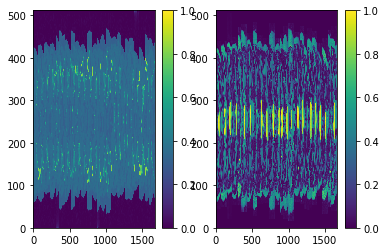

In [25]:

plt.subplot(1,2,1)
plt.pcolormesh(All24CTArrayNorm[:,250,:])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(All24MRArrayNorm[:,250,:])
plt.colorbar()

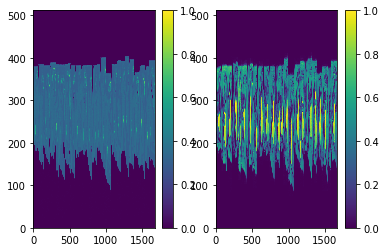

In [26]:

plt.subplot(1,2,1)
plt.pcolormesh(All24CTArrayNorm[250,:,:])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(All24MRArrayNorm[250,:,:])
plt.colorbar()

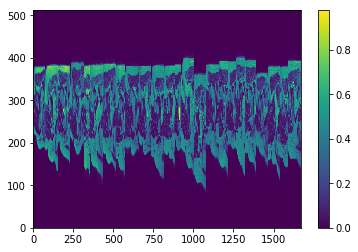

In [27]:
plt.pcolormesh(All24MRArrayNorm[200,:,:])
plt.colorbar()

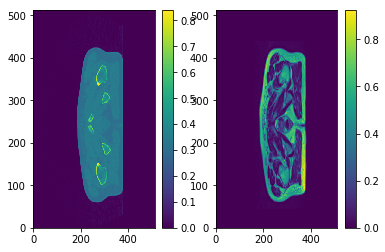

In [28]:
select = 35
plt.subplot(1,2,1)
plt.pcolormesh(All24CTArrayNorm[:,:,select])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(All24MRArrayNorm[:,:,select])
plt.colorbar()

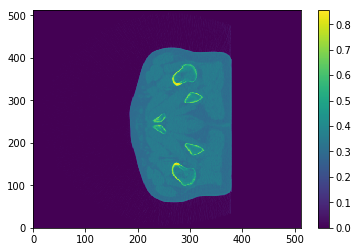

In [29]:
plt.pcolormesh(All24CTArrayNorm[:,:,36])
plt.colorbar()

In [30]:
slices = np.size(All24CTArrayNorm,2) #finds size of 3rd dimension
slices

1671

In [31]:
slices = np.size(All24MRArrayNorm,2) #finds size of 3rd dimension
slices

1671

In [32]:
All24CTArrayNormNew = np.zeros((slices,1,512,512),dtype=float)
for i in range(0,slices):
    All24CTArrayNormNew[i,0,:,:] =  All24CTArrayNorm[:,:,i]
    All24CTArrayNormNewRot = np.rot90(All24CTArrayNormNew[i,0,:,:],1)
#    All24CTArrayNormNewRotFlip = np.flipud(All24CTArrayNormNewRot)
    All24CTArrayNormNew[i,0,:,:] = All24CTArrayNormNewRot

In [33]:
All24MRArrayNormNew = np.zeros((slices,1,512,512),dtype=float)
for i in range(0,slices):
    All24MRArrayNormNew[i,0,:,:] =  All24MRArrayNorm[:,:,i]
    All24MRArrayNormNewRot = np.rot90(All24MRArrayNormNew[i,0,:,:],1)
#    All24MRArrayNormNewRotFlip = np.flipud(All24MRArrayNormNewRot)
    All24MRArrayNormNew[i,0,:,:] = All24MRArrayNormNewRot

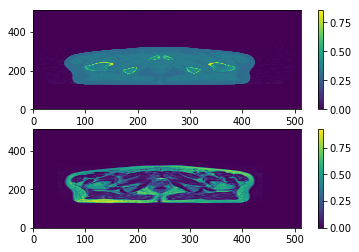

In [34]:
plt.subplot(2,1,1)
plt.pcolormesh(All24CTArrayNormNew[36,0,:,:])
plt.colorbar()
plt.subplot(2,1,2)
plt.pcolormesh(All24MRArrayNormNew[36,0,:,:])
plt.colorbar()

In [35]:
#np.save("D:/CNNdata/SynCT_LargerCohort_v3/CT24ptsTrainNorm/CT24ptsTrainNorm.npy", All24CTArrayNormNew)

In [36]:
#np.save("D:/CNNdata/SynCT_LargerCohort_v3/MR24ptsTrainNorm/MR24ptsTrainNorm.npy", All24MRArrayNormNew)